### Abstract
The aim of this project is to develop a model to predict house prices before their sale.
The data is drawn from house sales in King County House Data from the year 2014 to 2015.
The dataset has 19 columns and 21,613 rows.
Initially going through the code, I came across various logical errors and did the required changes. Like dropping independent variables showing high degree of collinearity from the dataset, removing lot of noise from the output and few other changes.
I have also added proper explanation to what we are achieving with each part of the code or what each graph is telling or what significant information we can draw from it. 
As part of this assignment, I have tuned or fitted various classification and regression models on the dataset and analyzed how well they performed. 
1.	Logistic Regression Model
2.	XGBoost Classifier
3.	Random Forest Classifier
4.	XGBoost Regressor
5.	K-Neighbor Regressor
6.	Linear Regression Model
Apart from implementing classification and regression models on the dataset, I have also performed hyperparameter tuning. Hyperparameter tuning helped me to choose the best parameter for that algorithm and achieve better result for the dataset.


### Dataset: King County House Price prediction 
### https://www.kaggle.com/harlfoxem/housesalesprediction/home .
#### This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#### Import Libraries

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline

#### Reading the Dataset

In [224]:
features = pd.read_csv('./Documents/king_county_cleansed.csv')

In [225]:
#Information of the dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 51 columns):
index               21613 non-null int64
price               21613 non-null int64
bedrooms            21613 non-null int64
bathrooms           21613 non-null float64
sqft_living         21613 non-null int64
sqft_lot            21613 non-null int64
waterfront          21613 non-null int64
sqft_above          21613 non-null int64
sqft_basement       21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
sqft_living15       21613 non-null int64
sqft_lot15          21613 non-null int64
basement_present    21613 non-null int64
renovated           21613 non-null int64
floors#1.0          21613 non-null int64
floors#1.5          21613 non-null int64
floors#2.0          21613 non-null int64
floors#2.5          21613 non-null int64
floors#3.0          2161

#### Let's first see how our data looks like. We'll print first ten rows for this.

In [226]:
features.head(10)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0
5,20559,295000,2,2.50,1630,1368,0,1280,350,2009,...,0,0,0,0,0,0,0,0,0,0
6,18690,470000,5,2.50,2210,9655,0,1460,750,1976,...,0,0,0,0,0,0,0,0,0,0
7,1041,550000,4,2.50,1940,10500,0,1140,800,1976,...,0,0,0,0,0,0,0,0,0,0
8,172,313000,3,1.50,1340,7912,0,1340,0,1955,...,0,0,0,0,0,0,0,0,0,0
9,7734,626000,3,2.25,1750,1572,0,1470,280,2005,...,0,0,0,0,0,0,0,0,0,0


#### Print the quick statistic summary of the data.

In [227]:
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We will now draw a heatmap to check correlation between variables. Correlation coefficients measure the strength of association between two variables. The most common correlation coefficient, called the Pearson product-moment correlation coefficient, measures the strength of the linear association between variables.

#### The sign and the absolute value of a Pearson correlation coefficient describe the direction and the magnitude of the relationship between two variables.

#### The value of a correlation coefficient ranges between -1 and 1. The greater the absolute value of a correlation coefficient, the stronger the linear relationship. The strongest linear relationship is indicated by a correlation coefficient of -1 or 1. The weakest linear relationship is indicated by a correlation coefficient equal to 0. A positive correlation means that if one variable gets bigger, the other variable tends to get bigger. A negative correlation means that if one variable gets bigger, the other variable tends to get smaller. Keep in mind that the Pearson correlation coefficient only measures linear relationships. Therefore, a correlation of 0 does not mean zero relationship between two variables; rather, it means zero linear relationship. (It is possible for two variables to have zero linear relationship and a strong curvilinear relationship at the same time.)

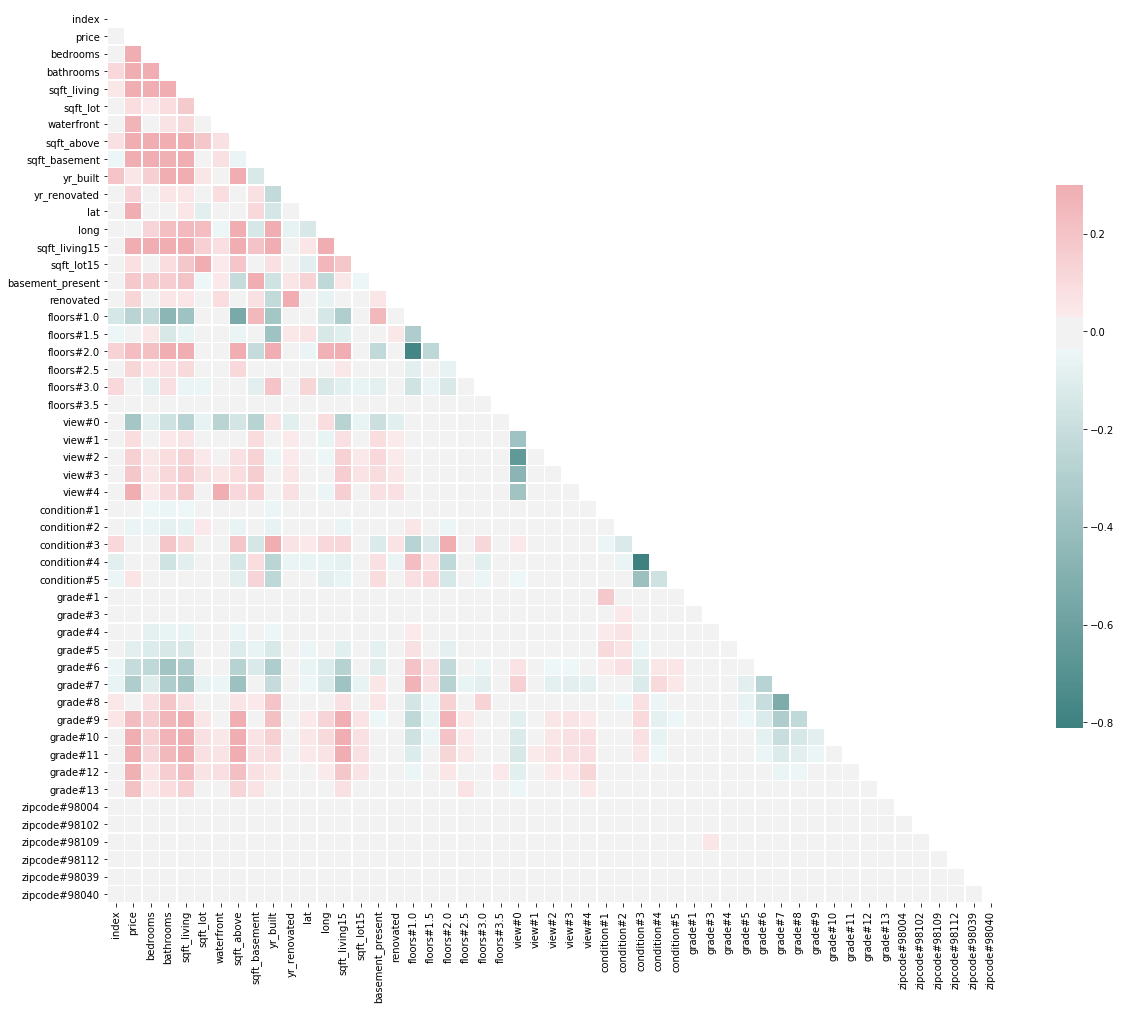

In [228]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

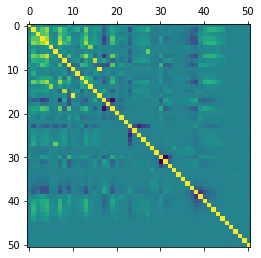

In [229]:
plt.matshow(features.corr())

#### We can now calculate median of the price. Which in this case came out to be 45,000.00

In [230]:
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


#### Add column to dataframe for holding categorical price value : HIGH/LOW
#### All values < median are LOW and Values >= median are HIGH

In [231]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [232]:
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


#### As can be seen above in the heatmap, grade#10, grade#11, grade#12 and grade13 are correlated with price variable. So, let's drop them.

In [233]:
features = features.drop(['price', 'grade#10', 'grade#11', 'grade#12', 'grade#13'], axis=1)

In [234]:
features.head(5)

,index,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade#7,grade#8,grade#9,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,3,2.25,1970,35100,0,1970,0,1977,0,...,0,0,1,0,0,0,0,0,0,-1
1,9596,3,2.50,2600,4750,0,1700,900,1951,0,...,0,0,1,0,0,0,0,0,0,1
2,9587,5,2.50,2820,67518,0,2820,0,1979,0,...,0,1,0,0,0,0,0,0,0,1
3,20602,4,2.50,3310,6500,0,3310,0,2012,0,...,0,1,0,0,0,0,0,0,0,1
4,11577,4,2.25,2160,8119,0,1080,1080,1966,0,...,0,1,0,0,0,0,0,0,0,-1


#### Part A
#### * Bagging Algo : Random Forest Classifier
#### * Boosting Algo : XGBoost Classifier

#### Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a classification problem.

#### Which hyper-parameters are important?
#### What hyper-parameter values work best?
#### Which supervised learner works best on the test data?

# Random Forest Classifier

In [235]:
#import library
from sklearn.model_selection import train_test_split

In [236]:
features.columns

Index(['index', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'zipcode#98004', 'zipcode#98102',
       'zipcode#98109', 'zipcode#98112', 'zipcode#98039', 'zipcode#98040',
       'price_cat'],
      dtype='object')

In [237]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels

In [238]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [239]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [240]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
RFC_Score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9023750771128933


#### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [241]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [242]:
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 0.275767
sqft_living         0.105219
sqft_living15       0.098153
sqft_above          0.076986
long                0.055393
sqft_lot15          0.052904
yr_built            0.049370
sqft_lot            0.047420
bathrooms           0.038895
grade#7             0.031387
sqft_basement       0.028592
bedrooms            0.019691
grade#6             0.016429
grade#8             0.015151
grade#9             0.011742
floors#1.0          0.011301
basement_present    0.011280
view#0              0.010322
floors#2.0          0.006145
condition#3         0.005759
condition#4         0.004570
floors#1.5          0.004522
yr_renovated        0.003268
condition#5         0.002852
view#2              0.001835
renovated           0.001660
view#4              0.001481
view#3              0.001400
zipcode#98004       0.001305
zipcode#98040       0.001156
waterfront          0.001146
floors#3.0          0.001086
grade#5             0.000945
zipcode#98112       0.000931
view#1        

In [243]:
top_features = feature_imp.head(10)
top_features

lat              0.275767
sqft_living      0.105219
sqft_living15    0.098153
sqft_above       0.076986
long             0.055393
sqft_lot15       0.052904
yr_built         0.049370
sqft_lot         0.047420
bathrooms        0.038895
grade#7          0.031387
dtype: float64

No handles with labels found to put in legend.


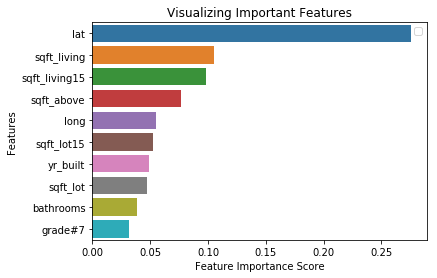

In [244]:
# Creating a bar plot
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [245]:
from pprint import pprint

In [246]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [247]:
from sklearn.model_selection import RandomizedSearchCV

In [248]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf};
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [249]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [250]:
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

#### Evaluate Random Search

#### AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

In [251]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [252]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [253]:
best_random = clf_random.best_estimator_

In [254]:
print('ROC for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('ROC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

ROC for base model : 0.8896282204427142
ROC for best model : 0.9018947432518


#### Grid Search with Cross Validation

In [255]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2);

In [256]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  6.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [257]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [258]:
best_grid = grid_search.best_estimator_

In [259]:
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

ROC for best grid search model : 0.9048207512657707


## Now lets implement XGBoost (eXtreme Gradient Boosting)
#### I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

In [260]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [261]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [262]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\kahma\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [263]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
XGBoostClassifier_Score = (accuracy * 100.0)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.22%


#### Which are the important hyper parameters?
#### ???
#### ???
#### ???

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Best: -0.208353 using {'n_estimators': 350}
-0.256615 (0.009792) with: {'n_estimators': 50}
-0.230276 (0.009765) with: {'n_estimators': 100}
-0.220565 (0.010246) with: {'n_estimators': 150}
-0.215514 (0.010866) with: {'n_estimators': 200}
-0.212035 (0.011566) with: {'n_estimators': 250}
-0.210044 (0.011772) with: {'n_estimators': 300}
-0.208353 (0.011693) with: {'n_estimators': 350}


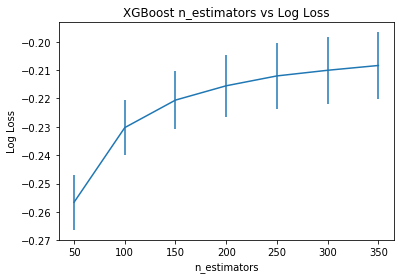

In [265]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

#### We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

#### The best number of trees was n_estimators=350 resulting in a log loss of -0.213537, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

#### Tune the Size of Decision Trees in XGBoost
#### In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

#### Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

#### Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

#### The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [266]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


Best: -0.204021 using {'max_depth': 7}
-0.332241 (0.007952) with: {'max_depth': 1}
-0.230276 (0.009765) with: {'max_depth': 3}
-0.210915 (0.008753) with: {'max_depth': 5}
-0.204021 (0.009317) with: {'max_depth': 7}
-0.209043 (0.011381) with: {'max_depth': 9}


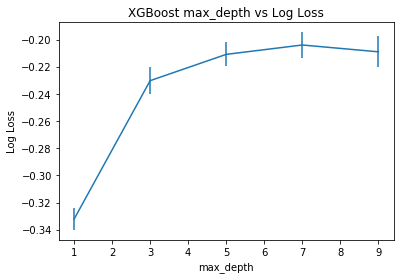

In [267]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

#### Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

#### Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

#### This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tune The Number of Trees and Max Depth in XGBoost
#### There is a relationship between the number of trees in the model and the depth of each tree.

#### We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

#### We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

#### We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4410 or 160 models will be trained and evaluated.

In [268]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7);
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 18.2min finished


Best: -0.204841 using {'max_depth': 6, 'n_estimators': 250}
-0.208104 (0.010390) with: {'max_depth': 6, 'n_estimators': 350}
-0.206444 (0.009745) with: {'max_depth': 6, 'n_estimators': 300}
-0.204841 (0.009197) with: {'max_depth': 6, 'n_estimators': 250}
-0.209524 (0.011178) with: {'max_depth': 6, 'n_estimators': 400}
-0.213252 (0.012612) with: {'max_depth': 7, 'n_estimators': 350}
-0.210404 (0.011938) with: {'max_depth': 7, 'n_estimators': 300}
-0.207923 (0.011208) with: {'max_depth': 7, 'n_estimators': 250}
-0.216713 (0.013700) with: {'max_depth': 7, 'n_estimators': 400}
-0.221298 (0.015790) with: {'max_depth': 8, 'n_estimators': 350}
-0.216733 (0.014247) with: {'max_depth': 8, 'n_estimators': 300}
-0.212858 (0.013223) with: {'max_depth': 8, 'n_estimators': 250}
-0.226119 (0.017140) with: {'max_depth': 8, 'n_estimators': 400}
-0.230310 (0.015705) with: {'max_depth': 9, 'n_estimators': 350}
-0.225688 (0.014962) with: {'max_depth': 9, 'n_estimators': 300}
-0.220289 (0.014052) with: {'m

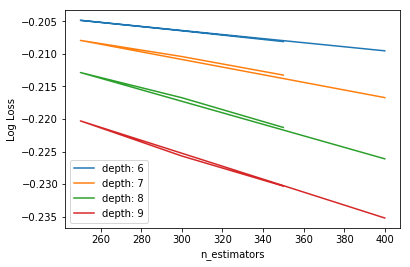

In [269]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

#### We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=5).

#### We can plot the relationship between each series of max_depth values for a given n_estimators.

#### Fewer boosted trees are required with increased tree depth.

#### Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation is left as an exercise you could explore yourself.

### Creating the model with the best values for Hyper parameters

In [270]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [271]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [272]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\kahma\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [273]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

ROC for the XGBoost model is: 0.9093038843925465


C:\Users\kahma\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Thus we got a higher ROC for XGBoost model than the bagging models tried earlier
## Classification with Logistic Regression
#### Compare logistic regression with the based tree algorithms in Part A on the same data. Answer the following questions for logistic regression:

#### Which independent variables are important?
#### Is there multi-colinearity?
#### How does it compare to the the models in Part A?
#### We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [274]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [275]:
features = pd.read_csv('./Documents/king_county_cleansed.csv')

In [276]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [277]:
features = features.drop(['grade#10', 'grade#11', 'grade#12', 'grade#13'], axis=1)

In [278]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'zipcode#98004', 'zipcode#98102',
       'zipcode#98109', 'zipcode#98112', 'zipcode#98039', 'zipcode#98040',
       'price_cat_log'],
      dtype='object')

In [279]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [280]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']] ,y_log,test_size=0.3,random_state=0)

In [281]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


In [282]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        21:56:39   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

### Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

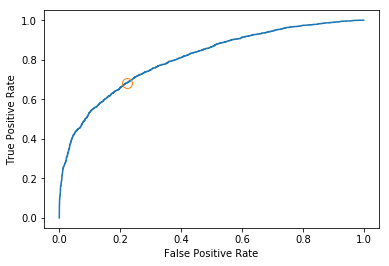

In [283]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [284]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8078695178147917

### As compared to Models in Part A, the accuracy of the Logistic Regression model is less.¶
### Regression with Trees
#### Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a regression problem. Answer the following questions for each supervised learner:

#### Which hyper-parameters are important?
#### What hyper-parameter values work best?
#### Which supervised learner works best on the test data?
### Random Forest based Regression
#### To look at the available hyperparameters, we can create a random forest and examine the default values.

In [285]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [286]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn
#### To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [287]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [288]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1);
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [289]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 77781.8088 degrees.
Accuracy = 85.71%.


In [290]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [291]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 73786.7397 degrees.
Accuracy = 86.51%.


### Grid Search with Cross Validation

In [292]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2);

In [293]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  9.8min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [294]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [295]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 92530.6939 degrees.
Accuracy = 82.41%.


### Now lets implement XGBoost (eXtreme Gradient Boosting)

In [296]:
from xgboost import XGBRegressor

In [298]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
xgbr_base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 84031.4442 degrees.
Accuracy = 84.35%.


In [299]:
base_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [300]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.713481 using {'n_estimators': 350}
0.679420 (0.013194) with: {'n_estimators': 50}
0.692971 (0.013708) with: {'n_estimators': 100}
0.700296 (0.013678) with: {'n_estimators': 150}
0.705088 (0.013808) with: {'n_estimators': 200}
0.708521 (0.013950) with: {'n_estimators': 250}
0.711400 (0.013603) with: {'n_estimators': 300}
0.713481 (0.013575) with: {'n_estimators': 350}


In [301]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\kahma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Best: 0.849805 using {'max_depth': 7}
0.672409 (0.033037) with: {'max_depth': 1}
0.812535 (0.041846) with: {'max_depth': 3}
0.843068 (0.035224) with: {'max_depth': 5}
0.849805 (0.030625) with: {'max_depth': 7}
0.847110 (0.030222) with: {'max_depth': 9}


In [302]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6, 7]
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.9min finished


Best: 0.734641 using {'max_depth': 5, 'n_estimators': 300}
0.727961 (0.012690) with: {'max_depth': 4, 'n_estimators': 300}
0.728333 (0.012838) with: {'max_depth': 4, 'n_estimators': 350}
0.729006 (0.012798) with: {'max_depth': 4, 'n_estimators': 400}
0.734641 (0.011000) with: {'max_depth': 5, 'n_estimators': 300}
0.734633 (0.011584) with: {'max_depth': 5, 'n_estimators': 350}
0.734173 (0.011796) with: {'max_depth': 5, 'n_estimators': 400}
0.732529 (0.011358) with: {'max_depth': 6, 'n_estimators': 300}
0.731497 (0.011349) with: {'max_depth': 6, 'n_estimators': 350}
0.730860 (0.011508) with: {'max_depth': 6, 'n_estimators': 400}
0.732381 (0.014794) with: {'max_depth': 7, 'n_estimators': 300}
0.730602 (0.014883) with: {'max_depth': 7, 'n_estimators': 350}
0.729639 (0.015425) with: {'max_depth': 7, 'n_estimators': 400}


In [303]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [304]:
best_XGBoost.fit(X_train_reg, y_train_reg)
xgbr_best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 70064.6130 degrees.
Accuracy = 87.13%.


### XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression
#### Evaluating the regression models

In [305]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [306]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 143881.6


In [307]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

XGBoost best model RMSE is : 133079.06


## Ridge Regression

In [308]:
from sklearn.linear_model import RidgeCV, Ridge
ridge_cv = RidgeCV([0.001,0.0001,0.00001,5,0.1,1,10,50,100])
model_cv = ridge_cv.fit(X_train_reg, y_train_reg)
model_cv.alpha_

0.001

In [314]:
from sklearn.metrics import r2_score
ridge_model = Ridge(model_cv.alpha_)
ridge_model.fit(X_train_reg, y_train_reg)
y_pred_rid = ridge_model.predict(X_test_reg)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_reg, y_pred_rid))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_reg, y_pred_rid))
ridge_accuracy = (r2_score(y_test_reg, y_pred_rid))*100

Mean squared error: 47064854438.49
Variance score: 0.69


C:\Users\kahma\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.301249e-17
  overwrite_a=True).T


## KNN Alogorithm

#### Create train and test set

In [315]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(features, test_size = 0.3)

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']

#### Preprocessing – Scaling the features

In [316]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [317]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

### We now will look at the error rate for different k values

In [318]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 243930.91924140905
RMSE value for k=  2 is: 238572.86462896658
RMSE value for k=  3 is: 229493.47130799247
RMSE value for k=  4 is: 229602.4894223476
RMSE value for k=  5 is: 228001.51732525832
RMSE value for k=  6 is: 226779.0997740188
RMSE value for k=  7 is: 226204.49814626342
RMSE value for k=  8 is: 226838.39561545965
RMSE value for k=  9 is: 227299.66114452237
RMSE value for k=  10 is: 226871.75476177587
RMSE value for k=  11 is: 225695.43331672027
RMSE value for k=  12 is: 226467.357896602
RMSE value for k=  13 is: 227919.7835335974
RMSE value for k=  14 is: 229448.2364121227
RMSE value for k=  15 is: 229839.63996414357
RMSE value for k=  16 is: 230171.30222866905
RMSE value for k=  17 is: 230991.8567117059
RMSE value for k=  18 is: 231833.7646289993
RMSE value for k=  19 is: 232544.8601803804
RMSE value for k=  20 is: 233085.03985763693


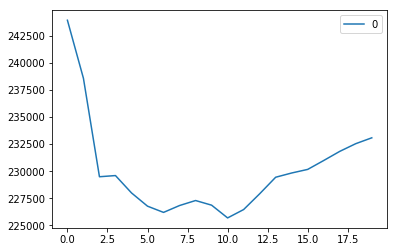

In [319]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#### As obvious, when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 11, the RMSE is approximately 225695.43, and shoots up on further increasing the k value. We can safely say that k=11 will give us the best result in this case.

In [320]:
knreg_score = (r2_score(y_test, pred))*100
print('Variance score: %.2f' % r2_score(y_test, pred))

Variance score: 0.63


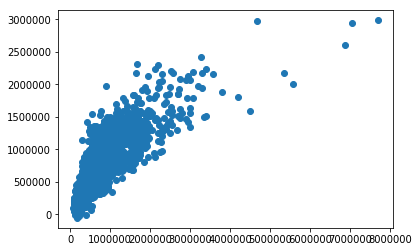

In [323]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, features.price, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
#Creating and Training the Model
lm = LinearRegression()
result = lm.fit(X_train,y_train)
#Let’s grab predictions off the test set and see how well it did!
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [325]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
linear_accuracy = (r2_score(y_test, predictions))*100
print('Variance score: %.2f' % r2_score(y_test, predictions))

Mean squared error: 46906637963.34
Variance score: 0.69


In [326]:
scores_table = {"Random Forest Classifier" : RFC_Score,
"XGBoost Classifier" : XGBoostClassifier_Score,
"Random Search CV Base Model" : base_accuracy,
"Random Search CV Best Model" : random_accuracy,
"Grid Search with Cross Validation" : grid_accuracy,
"XGBoost Regressor Base Model" : xgbr_base_accuracy,
"XGBoost Regressor Base Model" : xgbr_best_accuracy,
"K Neighbor Regression" : knreg_score,
"Linear Regression" : linear_accuracy}

In [327]:
scores_table

{'Random Forest Classifier': 0.9023750771128933,
 'XGBoost Classifier': 90.22208513263418,
 'Random Search CV Base Model': 85.71456949086615,
 'Random Search CV Best Model': 86.51079806873291,
 'Grid Search with Cross Validation': 82.4093838272939,
 'XGBoost Regressor Base Model': 87.1276253190745,
 'K Neighbor Regression': 63.249528179750044,
 'Linear Regression': 68.71819648929527}

### Conclusion

I have implemented various regression algorithms like Linear Regression, Random forest Classification, Ridge Regression, K-Neighbor Regression, Logistic Regression and XG Boosting Regression. After comparing all the results from these models, we found that Random Forest Classifier performs best with accuracy of 92.23%.

### Citations

[1] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html 

[2] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

[3] https://en.wikipedia.org/wiki/XGBoost

[4] https://en.wikipedia.org/wiki/Hyperparameter_optimization

[5] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
